In [22]:
#import modules
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime 
import time

#url for prior period 13F filings
url = "https://www.sec.gov/cgi-bin/current?q1=1&q2=0&q3=13f"

#get all links
page = requests.get(url)    
data = page.text
soup = BeautifulSoup(data, "lxml")
days_url = []

for link in soup.find_all('a'):
  if 'index' in link.get('href'):
    url_to_save = link.get('href')
    days_url.append(url_to_save)

print(days_url)

['/Archives/edgar/data/884548/0000884548-21-000005-index.html', '/Archives/edgar/data/1535847/0001580642-21-004472-index.html', '/Archives/edgar/data/1535847/0001580642-21-004473-index.html', '/Archives/edgar/data/1535847/0001580642-21-004474-index.html', '/Archives/edgar/data/1535847/0001580642-21-004475-index.html', '/Archives/edgar/data/1535847/0001580642-21-004476-index.html', '/Archives/edgar/data/1535847/0001580642-21-004477-index.html']


In [23]:
#check status code to make sure site can be hit
index ='https://www.sec.gov/Archives/edgar/data/884548/0000884548-21-000005-index.html'

r = requests.get(index)
#expect 200
r.status_code

200

In [24]:
#get all html files
for item in days_url:
    index ='https://www.sec.gov'+item
    index = pd.read_html(r.text)  
    index = index[0]
    index = index[(index['Document'].str.contains('.html')) & (index['Type'].str.contains('INFORMATION TABLE'))]
    try:
        index = index['Document'].iloc[0]
    except:
        index = ''

    print(index)

XML21MAR31.html
XML21MAR31.html
XML21MAR31.html
XML21MAR31.html
XML21MAR31.html
XML21MAR31.html
XML21MAR31.html


In [25]:
#build complete web address
for item in days_url:

  index ='https://www.sec.gov'+item
  index = pd.read_html(r.text)  
  index = index[0]
  index = index[(index['Document'].str.contains('.html')) & (index['Type'].str.contains('INFORMATION TABLE'))]
  try:
  	index = index['Document'].iloc[0]
  except:
  	index = ''

  url = item.replace('-index.html','')
  url = url.replace('-','')
  url = 'https://www.sec.gov'+  url + '/xslForm13F_X01/' + index
  url = url.replace('html','xml')
  cik_company = item.split('data/')[1].split('/')[0]
  time.sleep(1.5)
  print(url)

https://www.sec.gov/Archives/edgar/data/884548/000088454821000005/xslForm13F_X01/XML21MAR31.xml
https://www.sec.gov/Archives/edgar/data/1535847/000158064221004472/xslForm13F_X01/XML21MAR31.xml
https://www.sec.gov/Archives/edgar/data/1535847/000158064221004473/xslForm13F_X01/XML21MAR31.xml
https://www.sec.gov/Archives/edgar/data/1535847/000158064221004474/xslForm13F_X01/XML21MAR31.xml
https://www.sec.gov/Archives/edgar/data/1535847/000158064221004475/xslForm13F_X01/XML21MAR31.xml
https://www.sec.gov/Archives/edgar/data/1535847/000158064221004476/xslForm13F_X01/XML21MAR31.xml
https://www.sec.gov/Archives/edgar/data/1535847/000158064221004477/xslForm13F_X01/XML21MAR31.xml


In [26]:
#make request as web browser
import requests
test_url = 'https://www.sec.gov/Archives/edgar/data/1713458/000171345821000003/xslForm13F_X01/q2.13f2021.xml'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(test_url, headers=header)



In [27]:
#get column headers and build in pandas
DF_13F = pd.read_html(r.text)
DF_13F = DF_13F[-1]
DF_13F = DF_13F.iloc[2:]
new_header = DF_13F.iloc[0]
DF_13F.columns = new_header
DF_13F = DF_13F.iloc[1:]
DF_13F['date_reported'] = datetime.now().strftime("%Y%m")
DF_13F['cik_company'] = cik_company
value_to_store_as_index = DF_13F['CUSIP']+cik_company + datetime.now().strftime("%Y%m")
DF_13F['indice'] = value_to_store_as_index
DF_13F = DF_13F[['indice','NAME OF ISSUER','TITLE OF CLASS','CUSIP','(x$1000)','PRN AMT','PRN','date_reported','cik_company']]
DF_13F.head(10)

2,indice,NAME OF ISSUER,TITLE OF CLASS,CUSIP,(x$1000),PRN AMT,PRN,date_reported,cik_company
3,88579Y1011535847202109,3M CO,COM,88579Y101,286,1439,SH,202109,1535847
4,0003752041535847202109,ABB LTD,SPONSORED ADR,000375204,33,983,SH,202109,1535847
5,0028241001535847202109,ABBOTT LABS,COM,002824100,930,8022,SH,202109,1535847
6,00287Y1091535847202109,ABBVIE INC,COM,00287Y109,584,5183,SH,202109,1535847
7,0028962071535847202109,ABERCROMBIE & FITCH CO,CL A,002896207,2,37,SH,202109,1535847
8,0036541001535847202109,ABIOMED INC,COM,003654100,8,26,SH,202109,1535847
9,0009571001535847202109,ABM INDS INC,COM,000957100,1,31,SH,202109,1535847
10,0042251081535847202109,ACADIA PHARMACEUTICALS INC,COM,004225108,6,250,SH,202109,1535847
11,G1151C1011535847202109,ACCENTURE PLC IRELAND,SHS CLASS A,G1151C101,859,2913,SH,202109,1535847
12,00507V1091535847202109,ACTIVISION BLIZZARD INC,COM,00507V109,343,3592,SH,202109,1535847


In [28]:
#define prior period filings for parametric
parametric_3_31 = 'https://www.sec.gov/Archives/edgar/data/932859/000095012321006955/xslForm13F_X01/0000950123-21-006955-4498.xml'
parametric_6_30 = 'https://www.sec.gov/Archives/edgar/data/932859/000095012321010884/xslForm13F_X01/0000950123-21-010884-5467.xml'

import requests
parametric_3_31 = 'https://www.sec.gov/Archives/edgar/data/932859/000095012321006955/xslForm13F_X01/0000950123-21-006955-4498.xml'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(test_url, headers=header)

dfs = pd.read_html(r.text)


In [29]:
#pip install finnhub-python


In [152]:
import finnhub

# Setup client
finnhub_client = finnhub.Client(api_key="c4s3cpaad3ic8b7d22lg")

print(finnhub_client.symbol_lookup('88579Y101'))




{'count': 1, 'result': [{'description': '3M Co', 'displaySymbol': 'MMM', 'symbol': 'MMM', 'type': 'Common Stock'}]}


In [31]:
#load up 3/31 parametric file
parametric_3_31 = pd.read_csv('https://raw.githubusercontent.com/barrettfranks/ist652/master/Parametric_3_31.csv')

parametric_3_31.head(10)

,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH/PRN,PUT/CALL,INVESTMENT DISCRETION,OTHER MANAGER,SOLE,SHARED,NONE
0,10X GENOMICS INC-CLASS A,Common Stock,88025U109,"8,271","45,695",SH,NaN,SOLE,NaN,"42,925",0,"2,770"
1,1-800-FLOWERS.COM INC,Common Stock,68243Q106,"3,502","126,834",SH,NaN,SOLE,NaN,"74,851",0,"51,983"
2,1Life Healthcare Inc,Common Stock,68269G107,"1,864","47,704",SH,NaN,SOLE,NaN,"46,890",0,814
3,1ST BUS FINL SVCS INC COM,Common Stock,319390100,700,"28,314",SH,NaN,SOLE,NaN,"4,289",0,"24,025"
4,1ST SOURCE CORP,Common Stock,336901103,"1,684","35,390",SH,NaN,SOLE,NaN,"24,974",0,"10,415"
5,21VIANET GROUP INC SPONSORED ADR,ADR,90138A103,"3,179","98,420",SH,NaN,SOLE,NaN,"97,297",0,"1,123"
6,2U INC COM,Common Stock,90214J101,"7,864","205,713",SH,NaN,SOLE,NaN,"120,392",0,"85,321"
7,3D SYSTEMS CORP,Common Stock,88554D205,"7,359","268,175",SH,NaN,SOLE,NaN,"248,150",0,"20,025"
8,3M CO,Common Stock,88579Y101,"439,048","2,278,637",SH,NaN,SOLE,NaN,"1,700,263",0,"578,374"
9,4D Molecular Therapeutics Inc,Common Stock,3.51E+104,"1,365","31,473",SH,NaN,SOLE,NaN,98,0,"31,375"


In [32]:
#load up 6/30 parametric file
parametric_6_30 = pd.read_csv('https://raw.githubusercontent.com/barrettfranks/ist652/master/Parametric_6_30.csv')
parametric_6_30.head(10)

,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH/PRN,PUT/CALL,INVESTMENT DISCRETION,OTHER MANAGER,SOLE,SHARED,NONE
0,10X GENOMICS INC-CLASS A,Common Stock,88025U109,"10,755","54,925",SH,NaN,SOLE,NaN,"48,229",0,"6,696"
1,1-800-FLOWERS.COM INC,Common Stock,68243Q106,"3,682","115,533",SH,NaN,SOLE,NaN,"78,515",0,"37,018"
2,1Life Healthcare Inc,Common Stock,68269G107,"1,638","49,545",SH,NaN,SOLE,NaN,"48,732",0,813
3,1SPC PHARMACEUTICAL-UNSPOADR,ADR,12591J207,424,"73,764",SH,NaN,SOLE,NaN,"73,764",0,0
4,1ST BUS FINL SVCS INC COM,Common Stock,319390100,775,"28,645",SH,NaN,SOLE,NaN,"3,850",0,"24,795"
5,1ST SOURCE CORP,Common Stock,336901103,"1,198","25,784",SH,NaN,SOLE,NaN,"25,306",0,478
6,21VIANET GROUP INC SPONSORED ADR,ADR,90138A103,"2,541","110,710",SH,NaN,SOLE,NaN,"108,615",0,"2,095"
7,22ND CENTY GROUP INC COM,Common Stock,90137F103,47,"10,182",SH,NaN,SOLE,NaN,"10,182",0,0
8,2U INC COM,Common Stock,90214J101,"8,897","213,519",SH,NaN,SOLE,NaN,"117,392",0,"96,127"
9,360 DIGITECH INC,ADR,88557W101,950,"22,709",SH,NaN,SOLE,NaN,"20,779",0,"1,930"


In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
parametric_6_30.dtypes

NAME OF ISSUER            object
TITLE OF CLASS            object
CUSIP                     object
VALUE (x$1000)            object
SHRS OR PRN AMT           object
SH/PRN                    object
PUT/CALL                  object
INVESTMENT DISCRETION     object
OTHER MANAGER            float64
SOLE                      object
SHARED                     int64
NONE                      object
dtype: object

In [34]:
#change data type
parametric_6_30 = parametric_6_30.replace(',','', regex=True)
parametric_6_30["VALUE (x$1000)"] = pd.to_numeric(parametric_6_30["VALUE (x$1000)"])
parametric_6_30.head(10)


,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH/PRN,PUT/CALL,INVESTMENT DISCRETION,OTHER MANAGER,SOLE,SHARED,NONE
0,10X GENOMICS INC-CLASS A,Common Stock,88025U109,10755,54925,SH,NaN,SOLE,NaN,48229,0,6696
1,1-800-FLOWERS.COM INC,Common Stock,68243Q106,3682,115533,SH,NaN,SOLE,NaN,78515,0,37018
2,1Life Healthcare Inc,Common Stock,68269G107,1638,49545,SH,NaN,SOLE,NaN,48732,0,813
3,1SPC PHARMACEUTICAL-UNSPOADR,ADR,12591J207,424,73764,SH,NaN,SOLE,NaN,73764,0,0
4,1ST BUS FINL SVCS INC COM,Common Stock,319390100,775,28645,SH,NaN,SOLE,NaN,3850,0,24795
5,1ST SOURCE CORP,Common Stock,336901103,1198,25784,SH,NaN,SOLE,NaN,25306,0,478
6,21VIANET GROUP INC SPONSORED ADR,ADR,90138A103,2541,110710,SH,NaN,SOLE,NaN,108615,0,2095
7,22ND CENTY GROUP INC COM,Common Stock,90137F103,47,10182,SH,NaN,SOLE,NaN,10182,0,0
8,2U INC COM,Common Stock,90214J101,8897,213519,SH,NaN,SOLE,NaN,117392,0,96127
9,360 DIGITECH INC,ADR,88557W101,950,22709,SH,NaN,SOLE,NaN,20779,0,1930


In [35]:
#sort so as to isolate certain values
test = parametric_6_30.sort_values(['VALUE (x$1000)'], ascending=[False])
test2 = test.head(10)
test2

,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH/PRN,PUT/CALL,INVESTMENT DISCRETION,OTHER MANAGER,SOLE,SHARED,NONE
2478,MICROSOFT CORP,Common Stock,594918104,8922351,32935957,SH,NaN,SOLE,NaN,21936152,0,10999805
296,APPLE INC COM,Common Stock,37833100,7585775,55386793,SH,NaN,SOLE,NaN,44689073,0,10697720
201,AMAZON.COM INC,Common Stock,23135106,4857480,1411992,SH,NaN,SOLE,NaN,1152854,0,259138
3882,VANGAURD S&P 500 ETF,ETF,922908363,3818815,9704245,SH,NaN,SOLE,NaN,9480565,0,223680
1397,FACEBOOK INC A,Common Stock,30303M102,3175607,9132919,SH,NaN,SOLE,NaN,6292577,0,2840342
183,ALPHABET INC - CL A,Common Stock,02079K305,2751289,1126751,SH,NaN,SOLE,NaN,923313,0,203438
184,ALPHABET INC - CL C,Common Stock,02079K107,2253404,899089,SH,NaN,SOLE,NaN,735915,0,163174
2107,JOHNSON & JOHNSON,Common Stock,478160104,1817711,11033817,SH,NaN,SOLE,NaN,7988795,0,3045021
2116,JPMORGAN CHASE & CO,Common Stock,46625H100,1675217,10770331,SH,NaN,SOLE,NaN,8538956,0,2231375
3988,VISA INC,Common Stock,92826C839,1647068,7044172,SH,NaN,SOLE,NaN,5520649,0,1523523


In [36]:
import numpy as np
xy = parametric_3_31.merge(parametric_6_30,how='outer',left_on=['CUSIP'],right_on=['CUSIP'])
xyz = xy.fillna(0)
xyz = xyz.replace(',','', regex=True)
xyz["VALUE (x$1000)_y"] = pd.to_numeric(xyz["VALUE (x$1000)_y"])
xyz["VALUE (x$1000)_x"] = pd.to_numeric(xyz["VALUE (x$1000)_x"])
xyz['Change'] = (xyz['VALUE (x$1000)_y'] / xyz['VALUE (x$1000)_x'] -1 )*100
xyz.replace(np.inf, 0, inplace=True)
xyz.head(10)

,NAME OF ISSUER_x,TITLE OF CLASS_x,CUSIP,VALUE (x$1000)_x,SHRS OR PRN AMT_x,SH/PRN_x,PUT/CALL_x,INVESTMENT DISCRETION_x,OTHER MANAGER_x,SOLE_x,...,VALUE (x$1000)_y,SHRS OR PRN AMT_y,SH/PRN_y,PUT/CALL_y,INVESTMENT DISCRETION_y,OTHER MANAGER_y,SOLE_y,SHARED_y,NONE_y,Change
0,10X GENOMICS INC-CLASS A,Common Stock,88025U109,8271,45695,SH,0.0,SOLE,0.0,42925,...,10755.0,54925,SH,0,SOLE,0.0,48229,0.0,6696,30.032644
1,1-800-FLOWERS.COM INC,Common Stock,68243Q106,3502,126834,SH,0.0,SOLE,0.0,74851,...,3682.0,115533,SH,0,SOLE,0.0,78515,0.0,37018,5.139920
2,1Life Healthcare Inc,Common Stock,68269G107,1864,47704,SH,0.0,SOLE,0.0,46890,...,1638.0,49545,SH,0,SOLE,0.0,48732,0.0,813,-12.124464
3,1ST BUS FINL SVCS INC COM,Common Stock,319390100,700,28314,SH,0.0,SOLE,0.0,4289,...,775.0,28645,SH,0,SOLE,0.0,3850,0.0,24795,10.714286
4,1ST SOURCE CORP,Common Stock,336901103,1684,35390,SH,0.0,SOLE,0.0,24974,...,1198.0,25784,SH,0,SOLE,0.0,25306,0.0,478,-28.859857
5,21VIANET GROUP INC SPONSORED ADR,ADR,90138A103,3179,98420,SH,0.0,SOLE,0.0,97297,...,2541.0,110710,SH,0,SOLE,0.0,108615,0.0,2095,-20.069204
6,2U INC COM,Common Stock,90214J101,7864,205713,SH,0.0,SOLE,0.0,120392,...,8897.0,213519,SH,0,SOLE,0.0,117392,0.0,96127,13.135809
7,3D SYSTEMS CORP,Common Stock,88554D205,7359,268175,SH,0.0,SOLE,0.0,248150,...,12464.0,311845,SH,0,SOLE,0.0,290442,0.0,21403,69.370838
8,3M CO,Common Stock,88579Y101,439048,2278637,SH,0.0,SOLE,0.0,1700263,...,472511.0,2378850,SH,0,SOLE,0.0,1748296,0.0,630554,7.621718
9,4D Molecular Therapeutics Inc,Common Stock,3.51E+104,1365,31473,SH,0.0,SOLE,0.0,98,...,774.0,32158,SH,0,SOLE,0.0,76,0.0,32082,-43.296703


In [37]:
xyz1 = xyz.sort_values(['Change'], ascending=[False])
xyz1 = xyz1.head(10)

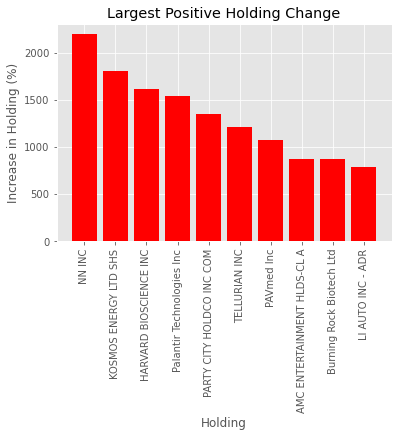

In [38]:
#set up chart for largest positive holdings
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = xyz1['NAME OF ISSUER_x']
cng = xyz1['Change']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, cng, color='red')
plt.xlabel("Holding")
plt.ylabel("Increase in Holding (%)")
plt.xticks(rotation = 90)
plt.title("Largest Positive Holding Change")

plt.xticks(x_pos, x)

plt.show()

In [149]:
#create a dataset where values are over a million
xyz3 = xyz[xyz['VALUE (x$1000)_x'] > 1000]
xyz3 = xyz3.sort_values(['Change'], ascending=[False])
xyz3 = xyz3.head(10)
xyz3


,NAME OF ISSUER_x,TITLE OF CLASS_x,CUSIP,VALUE (x$1000)_x,SHRS OR PRN AMT_x,SH/PRN_x,PUT/CALL_x,INVESTMENT DISCRETION_x,OTHER MANAGER_x,SOLE_x,...,VALUE (x$1000)_y,SHRS OR PRN AMT_y,SH/PRN_y,PUT/CALL_y,INVESTMENT DISCRETION_y,OTHER MANAGER_y,SOLE_y,SHARED_y,NONE_y,Change
191,AMC ENTERTAINMENT HLDS-CL A,Common Stock,00165C104,1834,179656,SH,0.0,SOLE,0.0,178349,...,17795.0,313957,SH,0,SOLE,0.0,290545,0.0,23412,870.283533
2579,Nitori Holdings Co Ltd,ADR,65479L108,1224,61202,SH,0.0,SOLE,0.0,52045,...,7179.0,399926,SH,0,SOLE,0.0,350167,0.0,49759,486.519608
3804,VERA BRADLEY INC,Common Stock,92335C106,1688,167135,SH,0.0,SOLE,0.0,78479,...,8740.0,705381,SH,0,SOLE,0.0,79417,0.0,625964,417.772512
1145,DOMO INC - CLASS B,Common Stock,257554105,1229,21831,SH,0.0,SOLE,0.0,18752,...,6078.0,75198,SH,0,SOLE,0.0,21133,0.0,54065,394.548413
324,ASANA INC - CL A,Common Stock,04342Y104,1616,56537,SH,0.0,SOLE,0.0,55571,...,7809.0,125887,SH,0,SOLE,0.0,90895,0.0,34992,383.230198
1857,INTELLIA THERAPEUTICS INC,Common Stock,45826J105,2208,27507,SH,0.0,SOLE,0.0,25077,...,10665.0,65872,SH,0,SOLE,0.0,41635,0.0,24237,383.016304
512,BIOHAVEN PHARMACEUTICAL HOLD,Common Stock,G11196105,1232,18032,SH,0.0,SOLE,0.0,15821,...,4485.0,46203,SH,0,SOLE,0.0,16792,0.0,29411,264.042208
2172,Lemonade Inc,Common Stock,52567D107,1565,16800,SH,0.0,SOLE,0.0,14302,...,5689.0,51999,SH,0,SOLE,0.0,47709,0.0,4290,263.514377
745,CD PROJEKT SA - UNSP ADR,ADR,125105106,1291,104253,SH,0.0,SOLE,0.0,97883,...,4678.0,384074,SH,0,SOLE,0.0,339462,0.0,44612,262.354764
3764,Vanguard Growth ETF,ETF,922908736,4423,17208,SH,0.0,SOLE,0.0,16683,...,15173.0,52904,SH,0,SOLE,0.0,51141,0.0,1763,243.047705


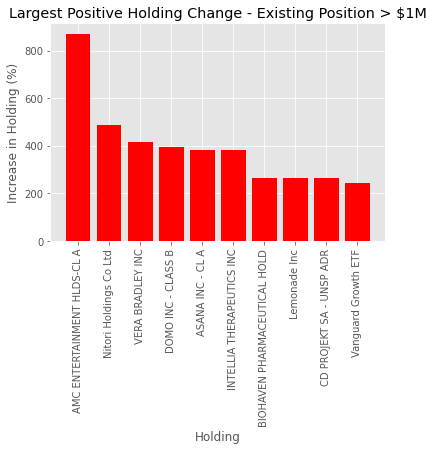

In [40]:
#create a new plot for largest increase holdings - where existing positions are >1M
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = xyz3['NAME OF ISSUER_x']
cng = xyz3['Change']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, cng, color='red')
plt.xlabel("Holding")
plt.ylabel("Increase in Holding (%)")
plt.xticks(rotation = 90)
plt.title("Largest Positive Holding Change - Existing Position > $1M")

plt.xticks(x_pos, x)

plt.show()

In [133]:
xyz3['CUSIP']

191     00165C104
2579    65479L108
3804    92335C106
1145    257554105
324     04342Y104
1857    45826J105
512     G11196105
2172    52567D107
745     125105106
3764    922908736
Name: CUSIP, dtype: object

In [118]:
#convert CUSIP into Ticker via finnhub
from pandas import json_normalize
import json

sample_list = []
for a in xyz3['CUSIP']:
    sample_list.append(finnhub_client.symbol_lookup(a))

sample_list

[{'count': 1,
  'result': [{'description': 'AMC Entertainment Holdings Inc',
    'displaySymbol': 'AMC',
    'symbol': 'AMC',
    'type': 'Common Stock'}]},
 {'count': 0, 'result': []},
 {'count': 1,
  'result': [{'description': 'Vera Bradley Inc',
    'displaySymbol': 'VRA',
    'symbol': 'VRA',
    'type': 'Common Stock'}]},
 {'count': 1,
  'result': [{'description': 'Domo Inc',
    'displaySymbol': 'DOMO',
    'symbol': 'DOMO',
    'type': 'Common Stock'}]},
 {'count': 1,
  'result': [{'description': 'Asana Inc',
    'displaySymbol': 'ASAN',
    'symbol': 'ASAN',
    'type': 'Common Stock'}]},
 {'count': 1,
  'result': [{'description': 'Intellia Therapeutics Inc',
    'displaySymbol': 'NTLA',
    'symbol': 'NTLA',
    'type': 'Common Stock'}]},
 {'count': 1,
  'result': [{'description': 'Biohaven Pharmaceutical Holding Company Ltd',
    'displaySymbol': 'BHVN',
    'symbol': 'BHVN',
    'type': 'Common Stock'}]},
 {'count': 1,
  'result': [{'description': 'Lemonade Inc',
    'displa

In [143]:
aa = [{'description': 'AMC Entertainment Holdings Inc',
   'displaySymbol': '00165C104',
   'symbol': 'AMC',
   'type': 'Common Stock'},
     {'description': 'Vera Bradley Inc',
    'displaySymbol': '92335C106',
    'symbol': 'VRA',
    'type': 'Common Stock'},
      {'description': 'Domo Inc',
    'displaySymbol': '257554105',
    'symbol': 'DOMO',
    'type': 'Common Stock'},
    {'description': 'Asana Inc',
    'displaySymbol': '04342Y104',
    'symbol': 'ASAN',
    'type': 'Common Stock'},
      {'description': 'Intellia Therapeutics Inc',
    'displaySymbol': '45826J105',
    'symbol': 'NTLA',
    'type': 'Common Stock'},
      {'description': 'Biohaven Pharmaceutical Holding Company Ltd',
    'displaySymbol': 'G11196105',
    'symbol': 'BHVN',
    'type': 'Common Stock'},
      {'description': 'Lemonade Inc',
    'displaySymbol': '52567D107',
    'symbol': 'LMND',
    'type': 'Common Stock'},
      {'description': 'Vanguard Growth ETF',
    'displaySymbol': '125105106',
    'symbol': 'VUG',
    'type': 'ETP'}
     ]


In [147]:
al = json_normalize(aa)
al

,description,displaySymbol,symbol,type
0,AMC Entertainment Holdings Inc,00165C104,AMC,Common Stock
1,Vera Bradley Inc,92335C106,VRA,Common Stock
2,Domo Inc,257554105,DOMO,Common Stock
3,Asana Inc,04342Y104,ASAN,Common Stock
4,Intellia Therapeutics Inc,45826J105,NTLA,Common Stock
5,Biohaven Pharmaceutical Holding Company Ltd,G11196105,BHVN,Common Stock
6,Lemonade Inc,52567D107,LMND,Common Stock
7,Vanguard Growth ETF,125105106,VUG,ETP


In [150]:
#join ticker to cusip dataset
xyz4 = xyz3.merge(al,how='outer',left_on=['CUSIP'],right_on=['displaySymbol'])
xyz4

,NAME OF ISSUER_x,TITLE OF CLASS_x,CUSIP,VALUE (x$1000)_x,SHRS OR PRN AMT_x,SH/PRN_x,PUT/CALL_x,INVESTMENT DISCRETION_x,OTHER MANAGER_x,SOLE_x,...,INVESTMENT DISCRETION_y,OTHER MANAGER_y,SOLE_y,SHARED_y,NONE_y,Change,description,displaySymbol,symbol,type
0,AMC ENTERTAINMENT HLDS-CL A,Common Stock,00165C104,1834,179656,SH,0.0,SOLE,0.0,178349,...,SOLE,0.0,290545,0.0,23412,870.283533,AMC Entertainment Holdings Inc,00165C104,AMC,Common Stock
1,Nitori Holdings Co Ltd,ADR,65479L108,1224,61202,SH,0.0,SOLE,0.0,52045,...,SOLE,0.0,350167,0.0,49759,486.519608,NaN,NaN,NaN,NaN
2,VERA BRADLEY INC,Common Stock,92335C106,1688,167135,SH,0.0,SOLE,0.0,78479,...,SOLE,0.0,79417,0.0,625964,417.772512,Vera Bradley Inc,92335C106,VRA,Common Stock
3,DOMO INC - CLASS B,Common Stock,257554105,1229,21831,SH,0.0,SOLE,0.0,18752,...,SOLE,0.0,21133,0.0,54065,394.548413,Domo Inc,257554105,DOMO,Common Stock
4,ASANA INC - CL A,Common Stock,04342Y104,1616,56537,SH,0.0,SOLE,0.0,55571,...,SOLE,0.0,90895,0.0,34992,383.230198,Asana Inc,04342Y104,ASAN,Common Stock
5,INTELLIA THERAPEUTICS INC,Common Stock,45826J105,2208,27507,SH,0.0,SOLE,0.0,25077,...,SOLE,0.0,41635,0.0,24237,383.016304,Intellia Therapeutics Inc,45826J105,NTLA,Common Stock
6,BIOHAVEN PHARMACEUTICAL HOLD,Common Stock,G11196105,1232,18032,SH,0.0,SOLE,0.0,15821,...,SOLE,0.0,16792,0.0,29411,264.042208,Biohaven Pharmaceutical Holding Company Ltd,G11196105,BHVN,Common Stock
7,Lemonade Inc,Common Stock,52567D107,1565,16800,SH,0.0,SOLE,0.0,14302,...,SOLE,0.0,47709,0.0,4290,263.514377,Lemonade Inc,52567D107,LMND,Common Stock
8,CD PROJEKT SA - UNSP ADR,ADR,125105106,1291,104253,SH,0.0,SOLE,0.0,97883,...,SOLE,0.0,339462,0.0,44612,262.354764,Vanguard Growth ETF,125105106,VUG,ETP
9,Vanguard Growth ETF,ETF,922908736,4423,17208,SH,0.0,SOLE,0.0,16683,...,SOLE,0.0,51141,0.0,1763,243.047705,NaN,NaN,NaN,NaN


In [164]:
#download ratings
sample_list2 = []
for b in xyz4['symbol']:
    sample_list2.append(finnhub_client.recommendation_trends(b))

sample_list2

[[{'buy': 0,
   'hold': 7,
   'period': '2021-09-01',
   'sell': 7,
   'strongBuy': 0,
   'strongSell': 2,
   'symbol': 'AMC'},
  {'buy': 0,
   'hold': 7,
   'period': '2021-08-01',
   'sell': 7,
   'strongBuy': 0,
   'strongSell': 2,
   'symbol': 'AMC'},
  {'buy': 0,
   'hold': 7,
   'period': '2021-07-01',
   'sell': 7,
   'strongBuy': 0,
   'strongSell': 2,
   'symbol': 'AMC'},
  {'buy': 0,
   'hold': 7,
   'period': '2021-06-01',
   'sell': 7,
   'strongBuy': 0,
   'strongSell': 2,
   'symbol': 'AMC'},
  {'buy': 1,
   'hold': 6,
   'period': '2021-05-01',
   'sell': 7,
   'strongBuy': 0,
   'strongSell': 2,
   'symbol': 'AMC'},
  {'buy': 0,
   'hold': 7,
   'period': '2021-04-01',
   'sell': 7,
   'strongBuy': 0,
   'strongSell': 2,
   'symbol': 'AMC'},
  {'buy': 0,
   'hold': 7,
   'period': '2021-03-01',
   'sell': 7,
   'strongBuy': 0,
   'strongSell': 2,
   'symbol': 'AMC'},
  {'buy': 0,
   'hold': 8,
   'period': '2021-02-01',
   'sell': 6,
   'strongBuy': 0,
   'strongSell': 

In [41]:
xyz2 = xyz.sort_values(['VALUE (x$1000)_x'], ascending=[False])
xyz2 = xyz2.head(10)
xyz2

,NAME OF ISSUER_x,TITLE OF CLASS_x,CUSIP,VALUE (x$1000)_x,SHRS OR PRN AMT_x,SH/PRN_x,PUT/CALL_x,INVESTMENT DISCRETION_x,OTHER MANAGER_x,SOLE_x,...,VALUE (x$1000)_y,SHRS OR PRN AMT_y,SH/PRN_y,PUT/CALL_y,INVESTMENT DISCRETION_y,OTHER MANAGER_y,SOLE_y,SHARED_y,NONE_y,Change
2398,MICROSOFT CORP,Common Stock,594918104,7618252,32312220,SH,0.0,SOLE,0.0,21278119,...,8922351.0,32935957,SH,0,SOLE,0.0,21936152,0.0,10999805,17.118087
275,APPLE INC COM,Common Stock,37833100,6621877,54211029,SH,0.0,SOLE,0.0,43453519,...,7585775.0,55386793,SH,0,SOLE,0.0,44689073,0.0,10697720,14.556266
187,AMAZON.COM INC,Common Stock,23135106,4220975,1364210,SH,0.0,SOLE,0.0,1108707,...,4857480.0,1411992,SH,0,SOLE,0.0,1152854,0.0,259138,15.079573
3750,VANGAURD S&P 500 ETF,ETF,922908363,3670177,10074602,SH,0.0,SOLE,0.0,9823424,...,3818815.0,9704245,SH,0,SOLE,0.0,9480565,0.0,223680,4.049886
1340,FACEBOOK INC A,Common Stock,30303M102,2591411,8798461,SH,0.0,SOLE,0.0,6010584,...,3175607.0,9132919,SH,0,SOLE,0.0,6292577,0.0,2840342,22.543549
169,ALPHABET INC - CL A,Common Stock,02079K305,2268508,1099872,SH,0.0,SOLE,0.0,901179,...,2751289.0,1126751,SH,0,SOLE,0.0,923313,0.0,203438,21.281873
170,ALPHABET INC - CL C,Common Stock,02079K107,1803226,871700,SH,0.0,SOLE,0.0,711448,...,2253404.0,899089,SH,0,SOLE,0.0,735915,0.0,163174,24.965146
2030,JOHNSON & JOHNSON,Common Stock,478160104,1783963,10854658,SH,0.0,SOLE,0.0,7802087,...,1817711.0,11033817,SH,0,SOLE,0.0,7988795,0.0,3045021,1.891743
2039,JPMORGAN CHASE & CO,Common Stock,46625H100,1588168,10432685,SH,0.0,SOLE,0.0,8241113,...,1675217.0,10770331,SH,0,SOLE,0.0,8538956,0.0,2231375,5.481095
3848,VISA INC,Common Stock,92826C839,1448072,6839236,SH,0.0,SOLE,0.0,5348298,...,1647068.0,7044172,SH,0,SOLE,0.0,5520649,0.0,1523523,13.742134


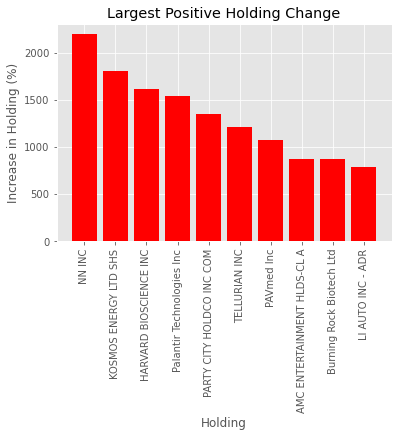

In [42]:
#largest positive holdings change
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = xyz1['NAME OF ISSUER_x']
cng = xyz1['Change']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, cng, color='red')
plt.xlabel("Holding")
plt.ylabel("Increase in Holding (%)")
plt.xticks(rotation = 90)
plt.title("Largest Positive Holding Change")

plt.xticks(x_pos, x)

plt.show()

In [43]:
xyz2

,NAME OF ISSUER_x,TITLE OF CLASS_x,CUSIP,VALUE (x$1000)_x,SHRS OR PRN AMT_x,SH/PRN_x,PUT/CALL_x,INVESTMENT DISCRETION_x,OTHER MANAGER_x,SOLE_x,...,VALUE (x$1000)_y,SHRS OR PRN AMT_y,SH/PRN_y,PUT/CALL_y,INVESTMENT DISCRETION_y,OTHER MANAGER_y,SOLE_y,SHARED_y,NONE_y,Change
2398,MICROSOFT CORP,Common Stock,594918104,7618252,32312220,SH,0.0,SOLE,0.0,21278119,...,8922351.0,32935957,SH,0,SOLE,0.0,21936152,0.0,10999805,17.118087
275,APPLE INC COM,Common Stock,37833100,6621877,54211029,SH,0.0,SOLE,0.0,43453519,...,7585775.0,55386793,SH,0,SOLE,0.0,44689073,0.0,10697720,14.556266
187,AMAZON.COM INC,Common Stock,23135106,4220975,1364210,SH,0.0,SOLE,0.0,1108707,...,4857480.0,1411992,SH,0,SOLE,0.0,1152854,0.0,259138,15.079573
3750,VANGAURD S&P 500 ETF,ETF,922908363,3670177,10074602,SH,0.0,SOLE,0.0,9823424,...,3818815.0,9704245,SH,0,SOLE,0.0,9480565,0.0,223680,4.049886
1340,FACEBOOK INC A,Common Stock,30303M102,2591411,8798461,SH,0.0,SOLE,0.0,6010584,...,3175607.0,9132919,SH,0,SOLE,0.0,6292577,0.0,2840342,22.543549
169,ALPHABET INC - CL A,Common Stock,02079K305,2268508,1099872,SH,0.0,SOLE,0.0,901179,...,2751289.0,1126751,SH,0,SOLE,0.0,923313,0.0,203438,21.281873
170,ALPHABET INC - CL C,Common Stock,02079K107,1803226,871700,SH,0.0,SOLE,0.0,711448,...,2253404.0,899089,SH,0,SOLE,0.0,735915,0.0,163174,24.965146
2030,JOHNSON & JOHNSON,Common Stock,478160104,1783963,10854658,SH,0.0,SOLE,0.0,7802087,...,1817711.0,11033817,SH,0,SOLE,0.0,7988795,0.0,3045021,1.891743
2039,JPMORGAN CHASE & CO,Common Stock,46625H100,1588168,10432685,SH,0.0,SOLE,0.0,8241113,...,1675217.0,10770331,SH,0,SOLE,0.0,8538956,0.0,2231375,5.481095
3848,VISA INC,Common Stock,92826C839,1448072,6839236,SH,0.0,SOLE,0.0,5348298,...,1647068.0,7044172,SH,0,SOLE,0.0,5520649,0.0,1523523,13.742134


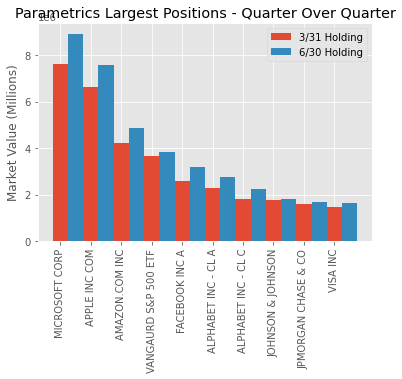

In [44]:
#view parametric's largest holdings
N = 10
men_means = xyz2["VALUE (x$1000)_x"]
women_means = xyz2["VALUE (x$1000)_y"]
x = xyz2['NAME OF ISSUER_x']

x_pos = [i for i, _ in enumerate(x)]

ind = np.arange(N) 
width = 0.5       
plt.bar(ind, men_means, width, label='3/31 Holding')
plt.bar(ind + width, women_means, width,
    label='6/30 Holding')

plt.ylabel('Market Value (Millions)')
plt.title('Parametrics Largest Positions - Quarter Over Quarter')

plt.xticks(x_pos, x)
plt.xticks(rotation = 90)

plt.legend(loc='best')
plt.show()